In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
sns.set_context('paper',font_scale=1.5)

In [2]:
delta_21_2=7.49e-5
delta_21_2_err=0.19e-5
delta_31_2=2.513e-3
delta_31_2_err=0.020e-3
delta_23_2=2.484e-3
delta_23_2_err=0.020e-3

In [3]:
def sum_mnu(m_lightest):
    NO=m_lightest+np.sqrt(m_lightest**2+delta_21_2)+np.sqrt(m_lightest**2+delta_31_2)
    IO=m_lightest+np.sqrt(m_lightest**2+delta_23_2-delta_21_2)+np.sqrt(m_lightest**2+delta_23_2)
    NO_err=delta_21_2_err/(2*np.sqrt(m_lightest**2+delta_21_2))+delta_31_2_err/(2*np.sqrt(m_lightest**2+delta_31_2))
    IO_err=(delta_23_2_err+delta_21_2_err)/(2*np.sqrt(m_lightest**2+delta_23_2-delta_21_2_err))+delta_23_2_err/(2*np.sqrt(m_lightest**2+delta_23_2))
    return NO,NO_err,IO,IO_err

In [10]:
NO0,NO0_err,IO0,IO0_err=sum_mnu(0)
NO0,NO0_err,IO0,IO0_err

(0.05878431004734465,
 0.0003092517746443111,
 0.09892232664659655,
 0.0004204313439428694)

In [5]:
m=np.logspace(-3,np.log10(0.3),1000)
NO,NO_err,IO,IO_err=sum_mnu(m)

In [6]:
best_lcdm=pd.read_excel('../data/combined/cmb+pelg+jmul-lcdm-free.xlsx',header=0,index_col=0)
cov_lcdm=pd.DataFrame(np.linalg.inv(best_lcdm.values),index=best_lcdm.index,columns=best_lcdm.columns)
err_lcdm=np.sqrt(cov_lcdm.loc['m_nu','m_nu'])
err_lcdm

0.017325511554144236

In [7]:
best_w0wacdm=pd.read_excel('../data/combined/cmb+pelg+jmul-w0wacdm-free.xlsx',header=0,index_col=0)
cov_w0wacdm=pd.DataFrame(np.linalg.inv(best_w0wacdm.values),index=best_w0wacdm.index,columns=best_w0wacdm.columns)
err_w0wacdm=np.sqrt(cov_w0wacdm.loc['m_nu','m_nu'])
err_w0wacdm

0.05443027283787847

In [8]:
DESI_lcdm=pd.read_excel('../data/combined/cmb+dmul-lcdm-free.xlsx',header=0,index_col=0)
covd_lcdm=pd.DataFrame(np.linalg.inv(DESI_lcdm.values),index=DESI_lcdm.index,columns=DESI_lcdm.columns)
errd_lcdm=np.sqrt(covd_lcdm.loc['m_nu','m_nu'])
errd_lcdm

0.01393121285007914

In [9]:
DESI_w0wacdm=pd.read_excel('../data/combined/cmb+dmul-w0wacdm-free.xlsx',header=0,index_col=0)
covd_w0wacdm=pd.DataFrame(np.linalg.inv(DESI_w0wacdm.values),index=DESI_w0wacdm.index,columns=DESI_w0wacdm.columns)
errd_w0wacdm=np.sqrt(covd_w0wacdm.loc['m_nu','m_nu'])
errd_w0wacdm

0.04553959152843073

In [12]:
(IO0-NO0)/err_lcdm,(IO0-NO0)/errd_lcdm

(2.3167002298209742, 2.8811573716658763)

In [18]:
(IO0-NO0)/err_w0wacdm,(IO0-NO0)/errd_w0wacdm

(0.7374208231291379, 0.8813872775778724)

In [16]:
from scipy.optimize import fsolve
def solve_m(m_lightest,err):
    return m_lightest+np.sqrt(m_lightest**2+delta_21_2)+np.sqrt(m_lightest**2+delta_31_2)-(NO0+2*err)
root=fsolve(solve_m,1e-2,args=(err_lcdm,))
root

array([0.01897677])

In [17]:
root=fsolve(solve_m,1e-2,args=(errd_lcdm,))
root

array([0.0159243])

Text(0.21, 0.034, '$w_0w_a\\mathrm{CDM}+\\sum m_\\nu+N_\\mathrm{eff}$')

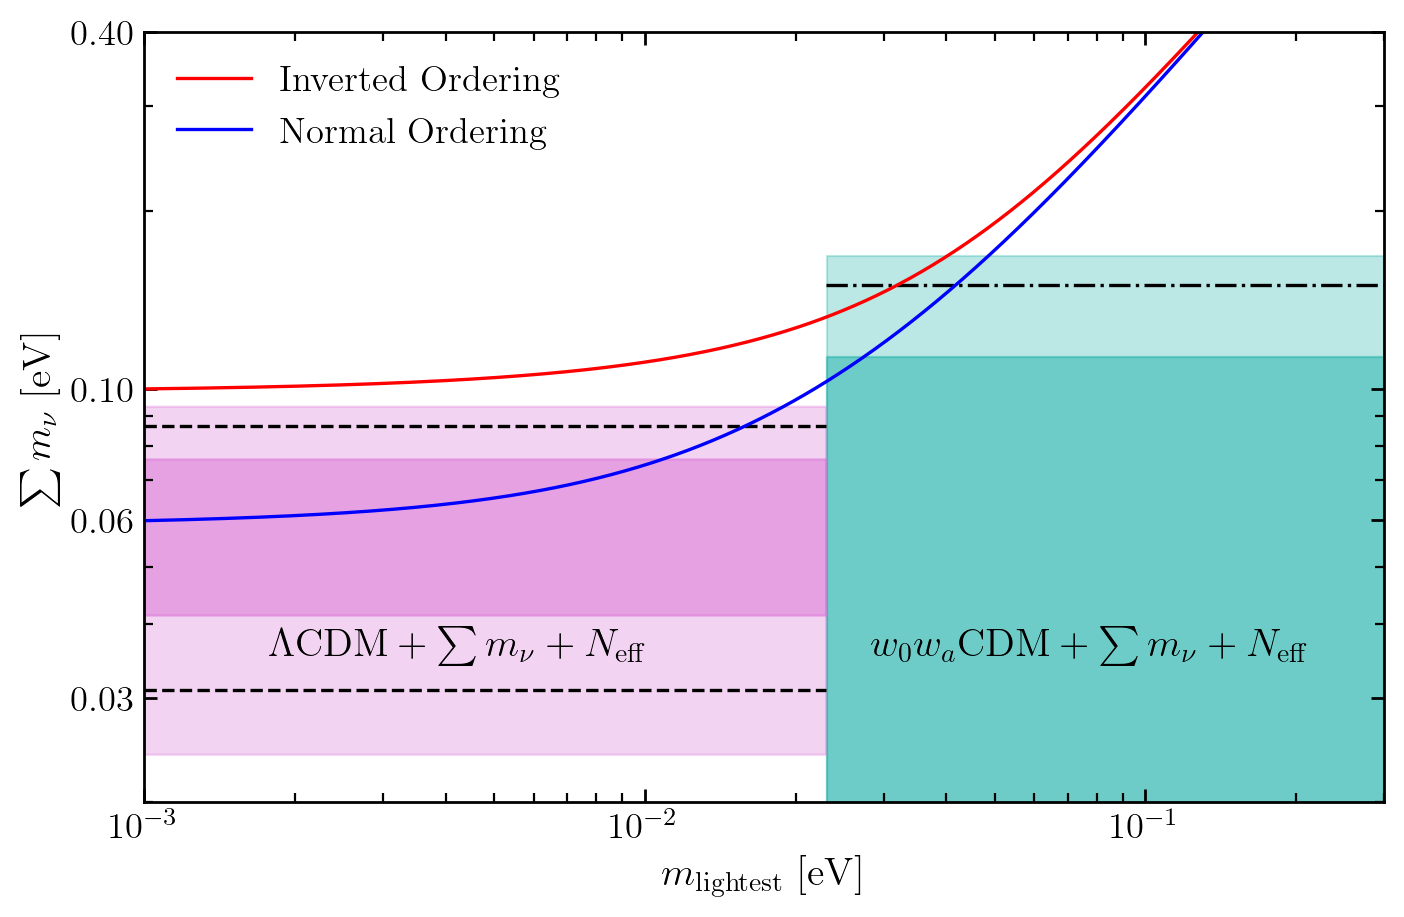

In [19]:
fig,ax=plt.subplots()
fig.set_size_inches(8,5)
fig.set_dpi(200)
cut=550
ax.fill_between(m[cut:],NO0+2*err_w0wacdm,NO0-2*err_w0wacdm,color='lightseagreen',alpha=0.3)
ax.fill_between(m[cut:],NO0+1*err_w0wacdm,NO0-1*err_w0wacdm,color='lightseagreen',alpha=0.5)
ax.fill_between(m[:cut],NO0+2*err_lcdm,NO0-2*err_lcdm,color='orchid',alpha=0.3)
ax.fill_between(m[:cut],NO0+1*err_lcdm,NO0-1*err_lcdm,color='orchid',alpha=0.5)
ax.axhline(NO0+2*errd_lcdm,0,cut/1000,ls='--',c='black')
ax.axhline(NO0-2*errd_lcdm,0,cut/1000,ls='--',c='black')
ax.axhline(NO0+2*errd_w0wacdm,cut/1000,1,ls='-.',c='black')
ax.axhline(NO0-2*errd_w0wacdm,cut/1000,1,ls='-.',c='black')
line1,=ax.loglog(m,NO,c='blue',label='Normal Ordering')
line2,=ax.loglog(m,IO,c='red',label='Inverted Ordering')
ax.set_xlim(1e-3,0.3)
ax.set_ylim(0.02,0.4)
ax.tick_params(which='both',direction='in',right=True,top=True)
ax.set_xlabel(r'$m_\mathrm{lightest}\;[\mathrm{eV}]$')
ax.set_ylabel(r'$\sum m_\nu\;[\mathrm{eV}]$')
f=ScalarFormatter()
f.set_scientific(False)
ax.yaxis.set_major_formatter(f)
ax.set_yticks([0.03,0.06,0.1,0.4])
ax.legend(handles=[line2,line1],loc='upper left',frameon=False)
ax.text(0.01,0.034,r'$\Lambda\mathrm{CDM}+\sum m_\nu+N_\mathrm{eff}$',horizontalalignment='right', verticalalignment='bottom')
ax.text(0.21,0.034,r'$w_0w_a\mathrm{CDM}+\sum m_\nu+N_\mathrm{eff}$',horizontalalignment='right', verticalalignment='bottom')

In [20]:
fig.savefig('band.pdf',bbox_inches='tight')